In [97]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import matplotlib.patheffects as path_effects
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'
;

''

In [98]:
'''KEYS'''
exclude_low_intensity = 1 
    # 0 - fullmass map, 1 - low intensity exclusion
half_mass = 0
    # 0 - fullmass map, 1 - halfmass map

In [117]:
''' READ IN OF DATA '''

'''
# m12i CO
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CO_J10/"
emission = "CO_J10"
intensity_mask = -7
text = r"$\mathbf{CO_{J10}}$"
v_max = 2 #0
#v_max = 12 #48
#v_max = 20 #70
#v_max = 20 #90
'''


'''
# m12i CII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CII_158mu/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CII_158mu/"
emission = "CII_158mu"
intensity_mask = -6
text = r"$\mathbf{[CII]_{158 \mu m}}$"
#v_max = 2 #0
#v_max = 10 #48
#v_max = 15 #70
v_max = 15 #90
'''


'''
# m12i NII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/NII_6585A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/NII_6585A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/NII_6585A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/NII_6585A/"
emission = "NII_6585A"
intensity_mask = -9
text = r"$\mathbf{[NII]_{6585A}}$"
#v_max = 2 #0
#v_max = 10 #48
#v_max = 12 #70
v_max = 12 #90
'''



'''
# m12i Halpha
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HI/"
parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HII/"
emission = "Halpha"
intensity_mask = -6
text = r"$\mathbf{H \alpha}$"
v_max = 2 #0
#v_max = 7 #48
#v_max = 7 #70
#v_max = 7 #90
'''




# m12i OIII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/OIII_5007A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/OIII_5007A/"
emission = "OIII_5007A"
intensity_mask = -5
text = r"$\mathbf{[OIII]_{5007A}}$"
#v_max = 2 #0
#v_max = 7 #48
#v_max = 10 #70
v_max = 10 #90


'''
# A4 CO
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CO_J10/"
emission = "CO_J10"
intensity_mask = -2
text = r"$\mathbf{CO_{J10}}$"
v_max = 2 #0
#v_max = 2 #48
#v_max = 2 #70
#v_max = 2 #90
'''


'''
# A4 CII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CII_158mu/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CII_158mu/"
emission = "CII_158mu"
intensity_mask = -2
text = r"$\mathbf{[CII]_{158 \mu m}}$"
#v_max = 2 #0
#v_max = 2 #48
#v_max = 2 #70
v_max = 2 #90
'''


'''
# A4 NII
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/NII_6548A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/NII_6548A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/NII_6548A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/NII_6548A/"
emission = "NII_6548A"
intensity_mask = -4
text = r"$\mathbf{[NII]_{6585A}}$"
v_max = 5 #0
#v_max = 5 #48
#v_max = 5 #70
#v_max = 5 #90
'''



'''
# A4 Halpha
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HI/"
parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HII/"
emission = "Halpha"
intensity_mask = -2
text = r"$\mathbf{H \alpha}$"
v_max = 10 #0
#v_max = 10 #48
#v_max = 10 #70
#v_max = 10 #90
'''



'''
# A4 OIII
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/OIII_5007A/"
emission = "OIII_5007A"
intensity_mask = -3
text = r"$\mathbf{[OIII]_{5007A}}$"
v_max = 5 #0
#v_max = 5 #48
#v_max = 5 #70
#v_max = 5 #90
'''

;

''

In [118]:
''' CALC MOMENT 0 '''

filepath_tot = parent + 'image_tot.hdf5'
filepath_con = parent + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)

'''
# Uncomment For Halpha
filepath_tot_2 = parent_2 + 'image_tot.hdf5'
filepath_con_2 = parent_2 + 'image_continuum.hdf5'
file_con_2 = h5.File(filepath_con,'r')
file_tot_2 = h5.File(filepath_tot,'r')

npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

image_array_2[image_array_2 < 0] = 0

frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

image_array = image_array + image_array_2
'''

#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
M0_arr = integrated_image_array_moment0

In [119]:
''' CALC MOMENT 1 '''

#moment 1
lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712,
                 "NII_6548A": 0.6545339822769165,
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

lambda_0 = lambda_0_dict[emission]
lambda_array = np.array(file_con['lambda_array'])
velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
M1_arr = isolate_moment_1

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [120]:
''' CALC MOMENT 2 '''

#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
M2_arr = isolate_moment_2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [121]:
bins = 32
cut = int((len(M1_arr))/bins)
bin_list = []
for i in range(bins):
    
    s = int(i*cut)
    s_end = int(i*cut + cut)
    
    #s_half2 = int(i*cut + (len(M1_arr)/2))
    #s_half2_end = int(i*cut + cut + (len(M1_arr)/2))
    
    moment_0_cut = M0_arr[:][s:s_end] #+ M0_arr[:][s_half2:s_half2_end]
    moment_1_cut = M1_arr[:][s:s_end] #+ M1_arr[:][s_half2:s_half2_end]
    moment_2_cut = M2_arr[:][s:s_end] #+ M2_arr[:][s_half2:s_half2_end]
    
    numerator = moment_0_cut * ((moment_1_cut)*(moment_1_cut))
    denominator = moment_0_cut * ((moment_2_cut)*(moment_2_cut))
    
    #NaN catcher
    if np.isnan(np.sum(numerator)):
        numerator[np.where(np.isnan(numerator))] = 0
    if np.isnan(np.sum(denominator)):
        denominator[np.where(np.isnan(denominator))] = 0
        
    # Low Intensity Mask
    for i in range(len(moment_0_cut)):
        for j in range(len(moment_0_cut[i])):
            if np.log10(moment_0_cut[i][j]/np.max(moment_0_cut)) < intensity_mask:
                numerator[i][j] = 0
                denominator[i][j] = 0
    
    #calc v/sigma for cut
    v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
    v_sigma = np.sqrt(v_sigma_sq)
    
    bin_list.append(v_sigma)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


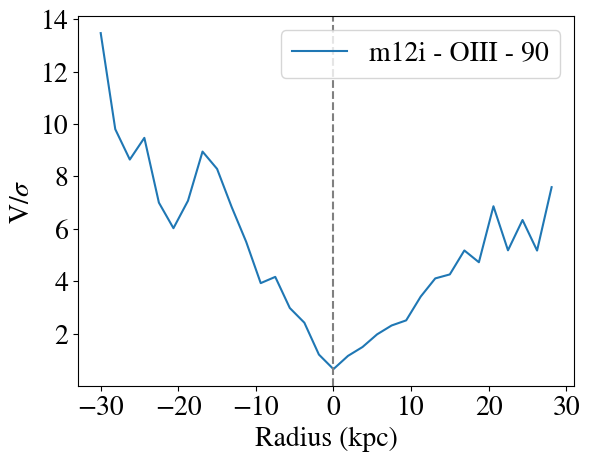

In [122]:
bin_indices = np.arange(bins)
bin_distances = (bin_indices - 16) * (30 / 16) 

plt.plot(bin_distances, bin_list, label = "m12i - OIII - 90")
plt.xlabel("Radius (kpc)", fontsize = 20)
plt.ylabel(r"V/$\sigma$", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axvline(x=0, color='gray', linestyle='--')

plt.legend(fontsize = 20)

plt.savefig('radial_cuts_m12i_OIII_90.png', bbox_inches='tight', pad_inches = 0, dpi = 500)
plt.show()